# 线性回归

In [22]:
#数据集：Iris
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()

x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

learning_rate = 0.05
batch_size = 25
x_data = tf.placeholder(tf.float32, shape=[None, 1])
y_data = tf.placeholder(tf.float32, shape=[None, 1])
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
model_output = tf.matmul(x_data, A) + b
#L2 loss
loss_L2 = tf.reduce_mean(tf.square(y_data - model_output))
#L1 loss
#loss = tf.reduce_mean(tf.abs(y_data - model_output))
sess.run(tf.global_variables_initializer())
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_L2)

loss_L2_vec = []
A_vec = []
b_vec = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size, replace=False)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_data: rand_y})
    loss_temp = sess.run(loss_L2, feed_dict={x_data: rand_x, y_data: rand_y})
    loss_L2_vec.append(loss_temp)
    A_temp = sess.run(A)
    A_vec.append(A_temp)
    b_temp = sess.run(b)
    b_vec.append(b_temp)

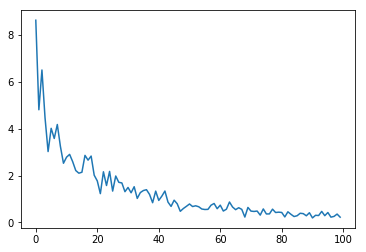

In [23]:
plt.plot(loss_L2_vec)
plt.show()

In [24]:
#数据集：Iris
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()

x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

learning_rate = 0.05
batch_size = 25
x_data = tf.placeholder(tf.float32, shape=[None, 1])
y_data = tf.placeholder(tf.float32, shape=[None, 1])
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
model_output = tf.matmul(x_data, A) + b
#L1 loss
loss_L1 = tf.reduce_mean(tf.abs(y_data - model_output))
sess.run(tf.global_variables_initializer())
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_L1)

loss_L1_vec = []
A_vec = []
b_vec = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size, replace=False)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_data: rand_y})
    loss_temp = sess.run(loss_L1, feed_dict={x_data: rand_x, y_data: rand_y})
    loss_L1_vec.append(loss_temp)
    A_temp = sess.run(A)
    A_vec.append(A_temp)
    b_temp = sess.run(b)
    b_vec.append(b_temp)

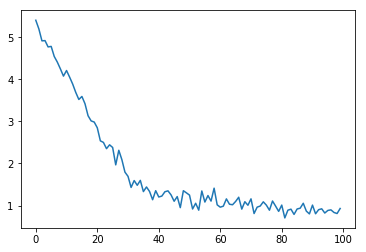

In [25]:
plt.plot(loss_L1_vec)
plt.show()

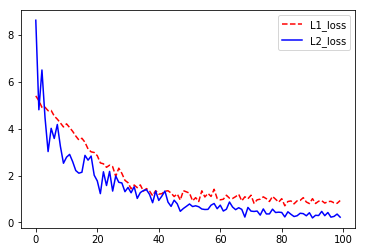

In [26]:
plt.plot(loss_L1_vec, 'r--', label='L1_loss')
plt.plot(loss_L2_vec, 'b-', label='L2_loss')
plt.legend()
plt.show()

# Lasso

In [17]:
#数据集：Iris
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()

x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

learning_rate = 0.001
batch_size = 50
x_data = tf.placeholder(tf.float32, shape=[None, 1])
y_data = tf.placeholder(tf.float32, shape=[None, 1])
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
model_output = tf.matmul(x_data, A) + b
#Loss_Lasso
lasso_param = tf.constant(0.9)
heavyside_step = tf.truediv(1.,
                            tf.add(1.,
                                   tf.exp(
                                       tf.multiply(-100.,
                                                   tf.subtract(A,
                                                               lasso_param)))))
regularization_parm = tf.multiply(heavyside_step, 99.)
loss_lasso = tf.add(
    tf.reduce_mean(tf.square(y_data - model_output)), regularization_parm)

sess.run(tf.global_variables_initializer())
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(
    loss_lasso)

loss_lasso_vec = []
A_vec = []
b_vec = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals), size=batch_size, replace=False)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_data: rand_y})
    loss_temp = sess.run(
        loss_lasso, feed_dict={
            x_data: rand_x,
            y_data: rand_y
        })
    loss_temp1 = loss_temp[0][0]
    loss_lasso_vec.append(loss_temp1)
    A_temp = sess.run(A)
    A_vec.append(A_temp)
    b_temp = sess.run(b)
    b_vec.append(b_temp)

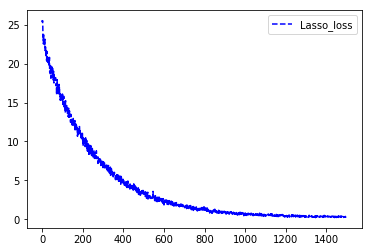

In [18]:
plt.plot(loss_lasso_vec, 'b--', label = 'Lasso_loss')
plt.legend()
plt.show()

# 岭回归

In [19]:
#数据集：Iris
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()

x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

learning_rate = 0.001
batch_size = 50
x_data = tf.placeholder(tf.float32, shape=[None, 1])
y_data = tf.placeholder(tf.float32, shape=[None, 1])
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
model_output = tf.matmul(x_data, A) + b
#Ridge_loss
ridge_param = tf.constant(0.9)
loss_penalty = tf.reduce_mean(tf.square(A))
loss_ridge = tf.expand_dims(
    tf.add(
        tf.reduce_mean(tf.square(y_data - model_output)),
        tf.multiply(ridge_param, loss_penalty)), 0)

sess.run(tf.global_variables_initializer())
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(
    loss_ridge)

loss_ridge_vec = []
A_vec = []
b_vec = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals), size=batch_size, replace=False)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_data: rand_y})
    loss_temp = sess.run(
        loss_ridge, feed_dict={
            x_data: rand_x,
            y_data: rand_y
        })
    #loss_temp1 = loss_temp[0][0]
    loss_ridge_vec.append(loss_temp1)
    A_temp = sess.run(A)
    A_vec.append(A_temp)
    b_temp = sess.run(b)
    b_vec.append(b_temp)

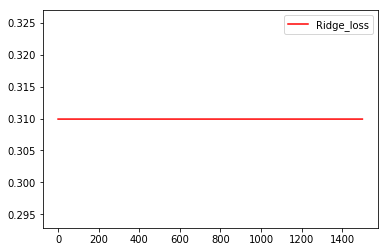

In [20]:
plt.plot(loss_ridge_vec, 'r-', label = 'Ridge_loss')
plt.legend()
plt.show()

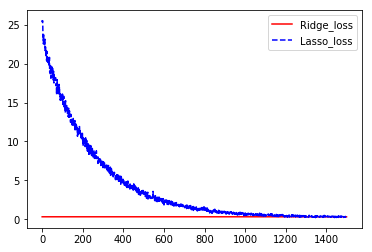

In [21]:
plt.plot(loss_ridge_vec, 'r-', label = 'Ridge_loss')
plt.plot(loss_lasso_vec, 'b--', label = 'Lasso_loss')
plt.legend()
plt.show()

# 4tensorboard

In [3]:
#数据集：Iris
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

ops.reset_default_graph()



iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

learning_rate = 0.05
batch_size = 25

with tf.name_scope('data'):
    x_data = tf.placeholder(tf.float32, shape=[None, 1])
    y_data = tf.placeholder(tf.float32, shape=[None, 1])
    
with tf.name_scope('parameters'):
    A = tf.Variable(tf.random_normal(shape=[1, 1]))
    b = tf.Variable(tf.random_normal(shape=[1, 1]))

with tf.name_scope('prediction'):
    model_output = tf.matmul(x_data, A) + b
#L2 loss
with tf.name_scope('loss'):
    loss_L2 = tf.reduce_mean(tf.square(y_data - model_output))
#L1 loss
#loss = tf.reduce_mean(tf.abs(y_data - model_output))
with tf.name_scope('init'):
    init = tf.global_variables_initializer()

    
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
with tf.name_scope('train'):
    train_step = optimizer.minimize(loss_L2)

sess = tf.Session()  
writer = tf.summary.FileWriter("D:/My_python_Data/Jupyter/logs/", sess.graph)
sess.run(init)
loss_L2_vec = []
A_vec = []
b_vec = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size, replace=False)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_data: rand_y})
    

    loss_temp = sess.run(loss_L2, feed_dict={x_data: rand_x, y_data: rand_y})
    loss_L2_vec.append(loss_temp)
    A_temp = sess.run(A)
    A_vec.append(A_temp)
    b_temp = sess.run(b)
    b_vec.append(b_temp)

ImportError: Traceback (most recent call last):
  File "F:\Anaconda3-5-1\envs\tensorflow\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "F:\Anaconda3-5-1\envs\tensorflow\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 21, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "F:\Anaconda3-5-1\envs\tensorflow\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 20, in swig_import_helper
    return importlib.import_module('_pywrap_tensorflow_internal')
  File "F:\Anaconda3-5-1\envs\tensorflow\lib\importlib\__init__.py", line 37, in import_module
    __import__(name)
ImportError: No module named _pywrap_tensorflow_internal


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.